# QML Python Worksheet

by M. Cerezo, Felipe Choy, Subadra Echeverria

This set of exercises is aimed at introducing the basic tools that will be later used for a Quantum Machine Learning (QML) implementation. 

We refer the reader to the [Qiskit webpage](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html) for further details.

In [ ]:
# Filename: QML_Python_Worksheet_1.ipynb
# Authors: Felipe Choy, Subadra Echeverria, M. Cerezo
# Date: November 11, 2020
# Description: First python exercice sheet.

## Getting started

First thing's first. Lets install some packages we will use.

In [1]:
!pip install qiskit
!pip install pylatexenc

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
from qiskit.quantum_info import *

## Hello World of Quantum Circuits

Here we will show how to use the basics of Qiskit. 

In [3]:
# Create a Quantum Circuit acting on a quantum register of two qubits
qcirc = QuantumCircuit(2)

We want to write the circuit that prepares a Bell pair.

In [4]:
# Add a H gate on qubit 0, putting this qubit in superposition.
qcirc.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
qcirc.cx(0, 1)

In [5]:
# We can visualize the circuit
qcirc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

Qiskit has a function called `statevector_simulator' which prints the quantum state obtained at the output of the circuit.

In [6]:


# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# Create a Quantum Program for execution
job = backend.run(qcirc)
result = job.result()
outputstate = result.get_statevector(qcirc, decimals=10)
print(outputstate)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


We can also simulate quantum measurements. For this purpose, we need to add measurements to the original circuit above, and use a different Aer backend.

In [7]:
# Create a Quantum Circuit with 2 quantum registers and 2 classical registers
meas = QuantumCircuit(2, 2)
meas.barrier(range(2))
# map the quantum measurement to the classical bits
meas.measure(range(2), range(2))

# The Qiskit circuit object supports composition using the addition operator.
qcirc.add_register(meas.cregs[0])
qc = qcirc.compose(meas)

#drawing the circuit
qc.draw()

┌───┐      ░ ┌─┐   
q_0: ┤ H ├──■───░─┤M├───
     └───┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░──╫─┤M├
          └───┘ ░  ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1

In [8]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator. We've set the number of repeats of the circuit to be 1024, which is the default.
N_shots=1024
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=N_shots)

# Grab the results from the job.
result_sim = job_sim.result()

In [9]:
# We can print the measurement outcomes and the probability of each outcome
counts = result_sim.get_counts(qc)
print(counts)
probability={}
for ele in counts:
  probability[ele]=counts[ele]/N_shots
print(probability)

{'11': 478, '00': 546}
{'11': 0.466796875, '00': 0.533203125}


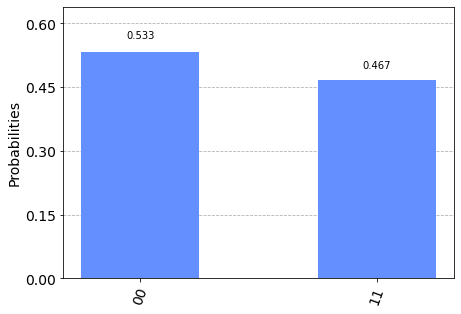

In [10]:
# And we can visualize them
plot_histogram(counts)

**Note**: This representation of the bitstring puts the most significant bit (MSB) in the left, and the least significant bit (LSB) on the right. This is the standard ordering of binary bitstrings. We order the qubits in the same way (qubit representing the MSB has index 0), which is why Qiskit uses a non-standard tensor product order.

We can double-check that the error in those probabilities are within the statistical uncertainty of order $1/\sqrt{N}$. Here $N=1024$. We recall that this uncertainty tells us that $p(i)=N_i/N\pm 1/\sqrt{N}$, where $N_i$ is the probability of the $i$-th outcome.

In [11]:
statistical_error=1/N_shots**.5
print(statistical_error)

0.03125


We can also check that the measurement outcomes are correct by using the  `statevector_simulator' and computing $p(00)=\text{Tr}[M_{00} \rho]$, with $\rho=|\psi\rangle\langle\psi|$.

Here, we use $M_{00}=|0\rangle\langle 0|\otimes|0\rangle\langle 0|=\begin{pmatrix}1&0\\0&0\end{pmatrix}\otimes \begin{pmatrix}1&0\\0&0\end{pmatrix}=\begin{pmatrix}1&0&0&0\\0&0&0&0\\0&0&0&0\\0&0&0&0\end{pmatrix}$.

In [12]:
M00=np.array([[1,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
rho=np.outer(outputstate, outputstate.conj())
p00=np.trace(np.matmul(M00,rho))
print(p00)

(0.5000000000190247+0j)


We can also create a circuit where we only measure one qubit.


In [13]:
# Create a Quantum Circuit acting on a quantum register of two qubits
qcirc2 = QuantumCircuit(2)
qcirc2.h(0)
qcirc2.cx(0, 1)
qcirc2.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [14]:
# Create a Quantum Circuit with 2 quantum registers and 1 classical registers
meas2 = QuantumCircuit(2, 1)
meas2.barrier(range(2))
# map the quantum measurement to the classical bits
meas2.measure(0, 0)

# The Qiskit circuit object supports composition using the addition operator.
qcirc2.add_register(meas2.cregs[0])
qc2 = qcirc2.compose(meas2)

#drawing the circuit
qc2.draw()

┌───┐      ░ ┌─┐
q_0: ┤ H ├──■───░─┤M├
     └───┘┌─┴─┐ ░ └╥┘
q_1: ─────┤ X ├─░──╫─
          └───┘ ░  ║ 
c: 1/══════════════╩═
                   0

These are the measurement outcomes.

In [15]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator. We've set the number of repeats of the circuit to be 1024, which is the default.
N_shots=1024
job_sim = backend_sim.run(transpile(qc2, backend_sim), shots=N_shots)

# Grab the results from the job.
result_sim = job_sim.result()

# We can print the measurement outcomes and the probability of each outcome
counts = result_sim.get_counts(qc2)
print(counts)
probability={}
for ele in counts:
  probability[ele]=counts[ele]/N_shots
print(probability)

{'0': 531, '1': 493}
{'0': 0.5185546875, '1': 0.4814453125}


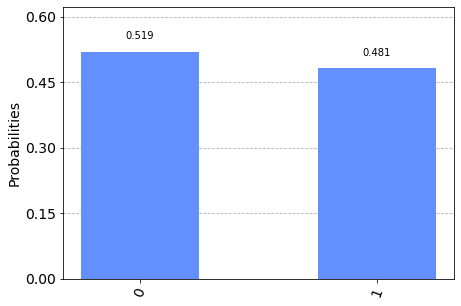

In [16]:
# And we can visualize them
plot_histogram(counts)

We can double check that the measurement outcomes are correct by using the  `statevector_simulator' and computing $p_A(0)=\text{Tr}[(M_{0}\otimes I_B) \rho]$, with $\rho=|\psi\rangle\langle\psi|$.

Note that due to qiskit's qubit ordering convention, we need to build the kronecker product with different qubit ordering.

Here, we use $(M_{0}\otimes I_B)=\begin{pmatrix}1&0\\0&1\end{pmatrix}\otimes \begin{pmatrix}1&0\\0&0\end{pmatrix}=\begin{pmatrix}1&0&0&0\\0&0&0&0\\0&0&1&0\\0&0&0&0\end{pmatrix}$.

In [17]:
M00=np.array([[1,0,0,0],[0,0,0,0],[0,0,1,0],[0,0,0,0]])
rho=np.outer(outputstate, outputstate.conj())
p00=np.trace(np.matmul(M00,rho))
print(p00)

(0.5000000000190247+0j)


## Quantum Operations

You can find a summary of Qiskit's quantum operations [here](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits/3_summary_of_quantum_operations.ipynb).

For now, let us create a single qubit state that is rotated about the $Y$-axis on an angle $\theta$.

In [18]:
def rotation_Y(quantum_circuit,theta)-> None:
  '''
    Applying a rotation about the Y axis to a single qubit

    Parameters
    ----------
    quantum_circuit: QuantumCircuit
      The quantum cirquit to which we apply ansatz
    theta: float
        The parameters for the R_y gate

  '''
  quantum_circuit.ry(theta,0)

In [19]:
# We set theta=pi/2
qcirc3 = QuantumCircuit(1)
rotation_Y(qcirc3,np.pi/2)
qcirc3.draw()

┌─────────┐
q_0: ┤ Ry(π/2) ├
     └─────────┘

We denote as $|\psi(\theta)\rangle=R_y(\theta)|0\rangle$ the otput state from the previous circuit.

### Computing expectation values.

Here we will compute the expectation value of the $Z$ operator over a single qubit quantum state.

In [21]:
# First, let us define the Z-Pauli operator
Z=np.array([[1,0],[0,1]])
print(Z)

#We can also import it from qiskit as 



print(qi.Pauli('Z').to_matrix())

[[1 0]
 [0 1]]
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]


**Exercice 1:** 

Use the statevector_simulator backend to compute the expectation value of $Z$ as a function of $\theta$. Here, use  matrix multiplication to compute $\langle Z\rangle=\langle\psi(\theta)|Z|\psi(\theta)\rangle$. Make a plot of $\langle Z\rangle$ versus $\theta$.




In [ ]:
# Solution to Exercice 1:

**Exercice 2:**

Simulate measurements to compute the expectation value of $Z$ as a function of $\theta$.

In [ ]:
# Solution to Exercice 2:

## First Variational Quantum Algorithm

From the previous, we see that it is very easy to verify that $\langle Z\rangle$ is minimized for $\theta=-\pi$. However, we want to solve this problem numerically. First, we load an optimizer.

In [22]:
# Load an optimization package
from scipy.optimize import minimize

**Exercice 3:** 
Define a cost function $C(\theta)$ that takes as input a parameter $\theta$ and outputs $\langle\psi(\theta)|Z|\psi(\theta)\rangle$.

In [ ]:
# Solution to Exercice 3:
def cost_function(theta):
  '''
  Define here.
  '''
  return(cost_value)


In [ ]:
## We can optimize the cost function using the minimize function.

# First, we set a random parameter to start the optimziation
t0 = np.random.rand() * 2 * np.pi

# We then run the optimization using the COBYLA method, with a maximum of 300 iteration steps
out = minimize(cost_function, x0, method="COBYLA", options={'maxiter':300}, callback=callback)

**Exercice 4:** 
Verify that the optimization finds the correct solution of $\theta=-\pi\,\, \text{mod}(2\pi)$.

**Exercice 5:** 
Plot the cost function value versus iteration step.

Tip: define an empty array `cost_function_values = [ ]` and add a line to the cost function that appends cost value to the previous array: `cost_function_values.append( )`.

In [ ]:
# Solution to Exercice 5:

## Second Variational Quantum Algorithm

Here we implement a variational algorithm in two qubits.

In [24]:
# First, let us define a two qubit gate that we will use as a basis for the parametrized two qubit circuit.

def two_qubit_gate(quantum_circuit,parameters,q0,q1)-> None:
  '''
    Applying a rotation about the Y axis to a single qubit

    Parameters
    ----------
    quantum_circuit: QuantumCircuit
      The quantum cirquit to which we apply ansatz
    parameters: float
        The parameters for the rotations 
    q1: int
      first qubit that the gate acts on
    q2: int
      second qubit that the gate acts on

  '''
  quantum_circuit.ry(parameters[0],q0)
  quantum_circuit.ry(parameters[1],q1)
  quantum_circuit.cx(q0,q1)
  quantum_circuit.ry(parameters[2],q0)
  quantum_circuit.ry(parameters[3],q1)


In [25]:
# Here we show the action of the two-qubit gate with 4 random angles
random_parameters = np.random.rand(4) * 2 * np.pi
qcirc4 = QuantumCircuit(2)
two_qubit_gate(qcirc4,random_parameters,0,1)
qcirc4.draw()

┌────────────┐     ┌────────────┐
q_0: ┤ Ry(3.2132) ├──■──┤ Ry(1.0686) ├
     ├────────────┤┌─┴─┐├────────────┤
q_1: ┤ Ry(5.2556) ├┤ X ├┤ Ry(1.8994) ├
     └────────────┘└───┘└────────────┘

**Exercice 6:** 
If we apply two layers of the `two_qubit_gate unitary` we will have a redundancy of two Ry gates acting one after the other. How can we remove this parameter redundancy?

In [ ]:
# Solution to Exercice 6:

**Exercice 7:**

Write cost functions that minimize the expectation values $\langle Z\otimes Z\rangle$ and $\langle X\otimes I\rangle$.

In [ ]:
# Solution to Exercice 7:

## The Ising Model
The Ising model is a well-known condensed matter model that describes ferromagnetism in statistical mechanics. At its core, it describes interactions between spins in the systems and the interactions between the spins and an external magnetic field.

The Hamiltonian of the model is

$H=-\sum_{i=1}^n X_i\otimes X_{i+1}-g\sum_{i=1}^n Z_i$.

Here, the terms $X_i\otimes X_{i+1}$ describe the spin-spin interaction, while $Z_i$ is the interaction between the spins and a magnetic field along the $z$ direction. 

This ground states of this model have a `phase transition` at $g=1$, such that for $g\leq 1$ the states are paramegnetic, while for $g\geq 1$ they are ferromagnetic.

**Exercice 8:**

Explicitly write the matrix for the Hamiltonian $H$ of the Ising model for $n=2,4,6$ spins. Then, make a plot of the eigenvalues of $H$ as a function of $g$. What happens at $g=1$?

In [ ]:
# Solution to Exercice 8:

**Exercice 9:**

Create a Variational Quantum Eigensolver (VQE) algorithm that finds the ground state of $H$ for $g=.25,.5,1.25,1.5$ (for $n=4$ or $n=6$).

For this purpose, first create a layered ansatz as the one shown bellow.
![](https://drive.google.com/uc?export=view&id=1qkKnMWf7ODE1hM_uMw84hs9C7hKmir_a)   
Here, $R_y$ are rotations about the $y$ axis (with independent angles). We show an ansatz with 3 layers.


In [ ]:
# Solution to Exercice 9:

## A Quantum Dataset
The Ising model provides a perfect way to create a dataset for quantum machine learning. Specifically, we will here create a supervised learning task of clasfifying states according go the phase of matter they belong to.

As previously mentioned, the ground states of the Ising model are paramagnetic for $g\leq 1$, and ferromagnetic for $g\geq 1$.

As shown in the figure below, this allows us to create a dataset of ground states $|\psi_i\rangle$ belonging to the either the paramagnetic of ferromagnetic phase.

![](https://drive.google.com/uc?export=view&id=1QFKr0jLt1iuoC5wedCc59t_HVCcZslUz)   



**Exercice 10:**

Randomly sample 30 fields $g$ in each phase and run VQE algorithms to create a dataset of $60$ ground states of the Ising model (for $n=6$). 

[Note: Check that VQE outputs the correct states! We want a high quality dataset. You can do this by only accepting VQE solutions that are within an error of 0.01 from the true value.]

We will divide this data into 2 sets:

A training set of $40$ states, and a testing set of $20$ states.

In [26]:
# Solution to Exercice 10:


Once we have the dataset, we can send the states trough a Quantum Neural Network that will learn to classify them. In this case, we will use a Quantum Convolutional Neural Network (QCNN). Below we show a QCNN for 4 qubits.

![](https://drive.google.com/uc?export=view&id=1LE3paDLp8NIL-Ck_Dmj0OTUCSNoUnmsC)


**Exercice 11:**

Write a code for the QCNN ansatz.

In [27]:
# Solution to Exercice 11:

The way in which we assign labels is by measuring the expectation value of the Pauli $Z$ operator on the output single-qubit state of the QCNN $\rho_i(\alpha)=\text{Tr}_{trash}[|\psi(\alpha)\rangle\langle\psi(\alpha)|]$, where $\alpha$ are the trainable parameters in the QCNN, $|\psi(\alpha)\rangle$ the full state at the output of the QCNN, and $trash$ the subset of qubits that are not measured. In the picture above, $|\psi(\alpha)\rangle$ is a pure state on four qubits and $\rho_i(\alpha)$ is the reduced state on the bottom qubit.

That is, the assigned label is $\widetilde{y}_i(\alpha)=\text{Tr}[\rho_i(\alpha)Z]$.

Note that, one can always compute this expectation value (using qiskit inverse kronecker product notation) as 

$\widetilde{y}_i(\alpha)=\text{Tr}[|\psi_i(\alpha)\rangle\langle \psi_i(\alpha)|(Z\otimes I\otimes I\otimes I)]=\langle \psi_i(\alpha)|(Z\otimes I\otimes I\otimes I)|\psi_i(\alpha)\rangle$.

And we train the mean-squared error loss function:
$\mathcal{L}(\alpha)=\frac{1}{40}\sum_{i=1}^{40}(\widetilde{y}_i(\alpha)-y_i)^2$.

**Exercice 12:**

Train the QCNN to classify quantum states according to the phase of matter that they belong to.

In [28]:
# Solution to Exercice 12:

Once we have trained the QCNN, we need to test its accurancy in clasifying. However, the expectation values previously computed are continous numbers in $[-1,1]$, while the true labels are discrete values in the set $\{-1,1\}$.

In order to assing a discrete label to each state, we need a discretizing function. For instance, this can be achieved by

$\widehat{y}_i=1$ if $\widetilde{y}_i(\alpha)\geq 0$, 

and 

$\widehat{y}_i=-1$ if $\widetilde{y}_i(\alpha)< 0$.

Given this discretization, we can now use the $20$ states in the testing set  to check how many of the assigned labels $\widehat{y}_i$ match with the true labels $y_i$.

**Exercice 13:**

Compute the percentage of correct label assignment on the testing set.

In [29]:
# Solution to Exercice 13: